<a href="https://colab.research.google.com/github/harshitha2403/Hate-Speech-Detection/blob/main/HSB_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Balanced dataset
“0″ means non-hateful
“1″ means hateful

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import CountVectorizer
import re
from tqdm import tqdm
from gensim.models.doc2vec import TaggedDocument
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARSHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
train = pd.read_csv('C:/Users/HARSHITHA/Desktop/Final_code/HateSpeech/trainHSB.csv')
test = pd.read_csv('C:/Users/HARSHITHA/Desktop/Final_code/HateSpeech/testHSB.csv')
print(train.shape)
print(test.shape)

(37500, 2)
(12500, 2)


In [ ]:
import string
stopword=set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")
def clean(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Use raw string
    text = re.sub(r'<.*?>+', '', text)                # Use raw string
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # OK, already using re.escape
    text = re.sub(r'\n', '', text)                    # Use raw string
    text = re.sub(r'\w*\d\w*', '', text)              # Use raw string
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
train["text"] = train["text"].apply(clean)

In [ ]:
x_train= train['text']
y_train = train['label']
x_test= test['text']
y_test = test['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(binary=True)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(x_train)
Train_X_Tfidf = Tfidf_vect.transform(x_train)
Test_X_Tfidf = Tfidf_vect.transform(x_test)

In [ ]:
print(Train_X_Tfidf.shape)
print(Test_X_Tfidf.shape)
print(y_train.shape)
print(y_test.shape)

(37500, 5000)
(12500, 5000)
(37500,)
(12500,)


Training Accuracy : 0.9955733333333333
Testing Accuracy : 1.0
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      6244
           1       0.78      0.79      0.79      6256

    accuracy                           0.78     12500
   macro avg       0.78      0.78      0.78     12500
weighted avg       0.78      0.78      0.78     12500



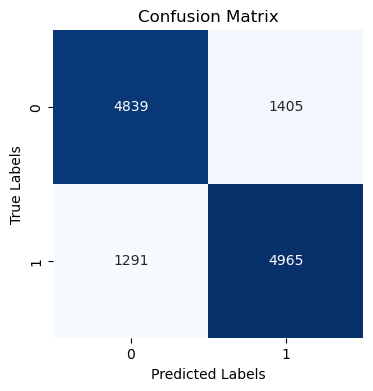

In [ ]:
RF = RandomForestClassifier()
RF.fit(Train_X_Tfidf,y_train)

predictions_RF = RF.predict(Test_X_Tfidf)

print(classification_report(y_test,predictions_RF))
cm_RF = confusion_matrix(y_test, predictions_RF)


plt.figure(figsize=(4, 4))
sns.heatmap(cm_RF, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      6244
           1       0.79      0.78      0.79      6256

    accuracy                           0.79     12500
   macro avg       0.79      0.79      0.79     12500
weighted avg       0.79      0.79      0.79     12500



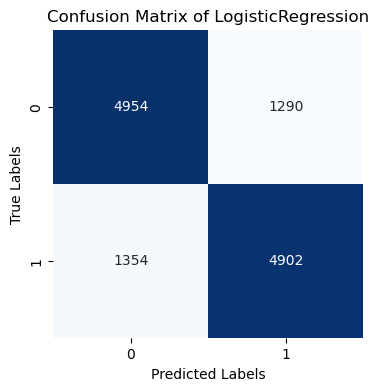

In [ ]:
LR = LogisticRegression()
LR.fit(Train_X_Tfidf,y_train)

predictions_LR = LR.predict(Test_X_Tfidf)

print(classification_report(y_test,predictions_LR))
cm_LR = confusion_matrix(y_test, predictions_LR)


plt.figure(figsize=(4, 4))
sns.heatmap(cm_LR, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of LogisticRegression')
plt.show()

In [ ]:
print("f1 score :", f1_score(y_test, predictions_LR))

f1 score : 0.7875964010282777


Training Accuracy : 0.9955733333333333
Testing Accuracy : 0.8248
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      6244
           1       0.78      0.79      0.79      6256

    accuracy                           0.78     12500
   macro avg       0.78      0.78      0.78     12500
weighted avg       0.78      0.78      0.78     12500



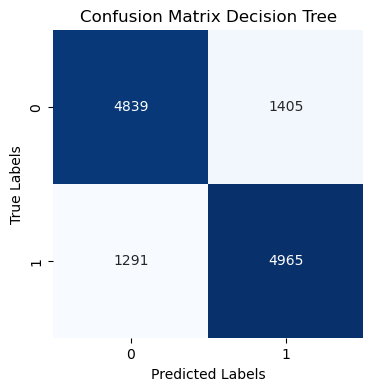

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(Train_X_Tfidf,y_train)

predictions_DT = DT.predict(Test_X_Tfidf)


print(classification_report(y_test,predictions_DT))
cm_DT = confusion_matrix(y_test, predictions_DT)


plt.figure(figsize=(4, 4))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Decision Tree')
plt.show()

Training Accuracy : 0.9955733333333333
Testing Accuracy : 0.77648
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      6244
           1       0.79      0.74      0.76      6256

    accuracy                           0.77     12500
   macro avg       0.77      0.77      0.77     12500
weighted avg       0.77      0.77      0.77     12500



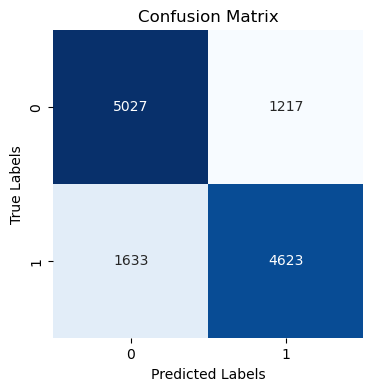

In [ ]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb= xgb_classifier.fit(Train_X_Tfidf,y_train)

predictions_xgb = xgb.predict(Test_X_Tfidf)


print(classification_report(y_test,predictions_xgb))
cm_xgb = confusion_matrix(y_test, predictions_xgb)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

[LibSVM]              precision    recall  f1-score   support

           0       0.78      0.79      0.79      6244
           1       0.79      0.78      0.78      6256

    accuracy                           0.79     12500
   macro avg       0.79      0.79      0.79     12500
weighted avg       0.79      0.79      0.79     12500



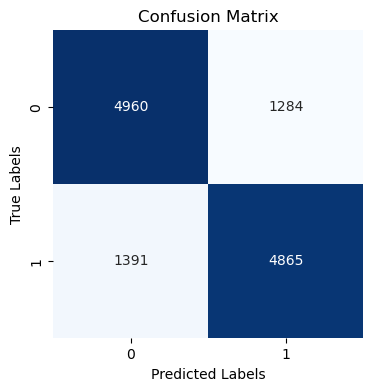

In [ ]:
from sklearn import svm

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',verbose=True)
SVM.fit(Train_X_Tfidf,y_train)

predictions_SVM = SVM.predict(Test_X_Tfidf)

print(classification_report(y_test,predictions_SVM))
cm_svm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Accuracy score of RF = {:.4f}'.format(RF.score(Test_X_Tfidf, y_test)))
print('Accuracy score of DT = {:.4f}'.format(DT.score(Test_X_Tfidf, y_test)))
print('Accuracy score of LR= {:.4f}'.format(LR.score(Test_X_Tfidf, y_test)))
print('Accuracy score of SVM= {:.4f}'.format(SVM.score(Test_X_Tfidf, y_test)))
print('Accuracy score of XGB= {:.4f}'.format(xgb_classifier.score(Test_X_Tfidf, y_test)))

Accuracy score of RF = 0.7843
Accuracy score of DT = 0.7314
Accuracy score of LR= 0.7885
Accuracy score of SVM= 0.7860
Accuracy score of XGB= 0.7720


In [ ]:
sample = ""
sample_tfidf = Tfidf_vect.transform([sample])
print(RF.predict(sample_tfidf))
print(DT.predict(sample_tfidf))
print(LR.predict(sample_tfidf))
print(SVM.predict(sample_tfidf))
print(xgb_classifier.predict(sample_tfidf))

[1]
[0]
[1]
[1]
[0]
